In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats.mstats import mquantiles
from scipy.spatial.distance import cdist

In [3]:
data_train = np.load('data/fashion_test.npy', mmap_mode='r')
data_test = np.load('data/fashion_train.npy', mmap_mode='r')

In [4]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]
X_test = data_test[:, :-1]
y_test = data_test[:, -1]

In [5]:
#applying scalar to the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Text(0, 0.5, 'explained variance ratio')

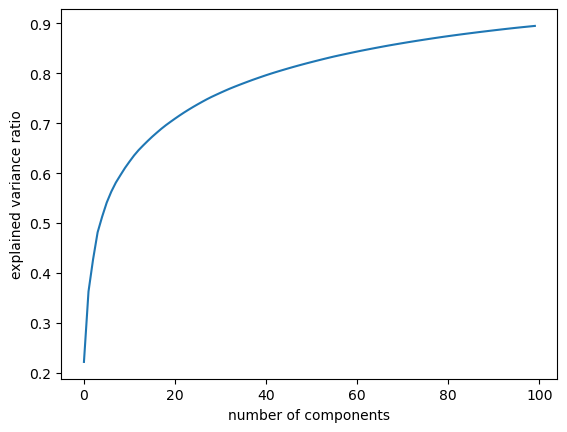

In [6]:
pca = PCA(n_components=100)
pca_transformed_X_train = pca.fit_transform(X_train_std)

explained_var_pca = pca.explained_variance_ratio_.cumsum()
#print(my_model.explained_variance_)
#print(my_model.explained_variance_ratio_)
#print(my_model.explained_variance_ratio_.cumsum())

plt.plot(explained_var_pca)
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')


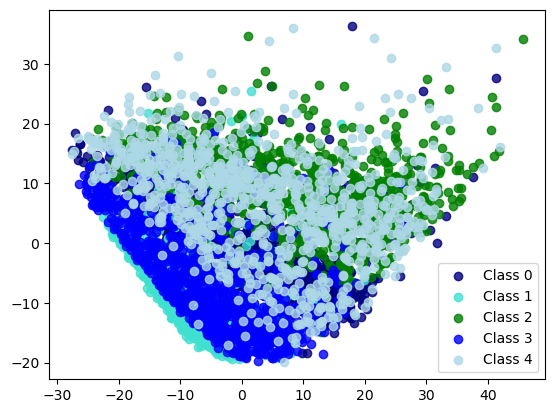

In [10]:
plt.figure()

colors = ["navy", "turquoise", "green", 'blue', 'lightblue'],
colors = ["navy", "turquoise", "green", 'blue', 'lightblue']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4]):
    plt.scatter(
        pca_transformed_X_train[y_train == i, 0], pca_transformed_X_train[y_train == i, 1], alpha=0.8, color=color, label=f'Class {i}'
    )
# Plotting x-axis (y=0 line)
#plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Plotting y-axis (x=0 line)
#plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc="best", shadow=False, scatterpoints=1)
#plt.title("PCA on clothing dataset")
plt.savefig("pca_plot.png")
plt.show()

ValueError: 'c' argument has 1000 elements, which is inconsistent with 'x' and 'y' with size 5000.

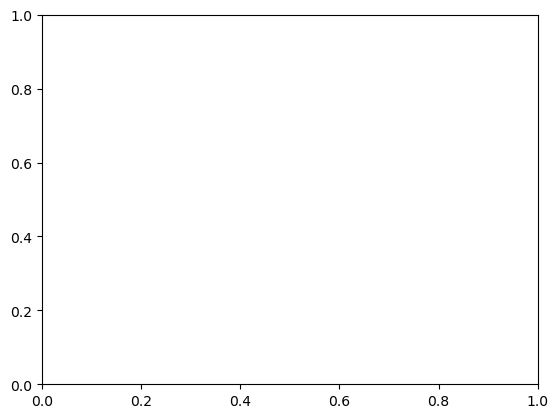

In [9]:
# Set limits for x and y axes
xlim = (-3000, 3000)
ylim = (-3000, 3000)

# Scatter plot of PC1 vs PC2
plt.scatter(pca_transformed_X_train[:, 0], pca_transformed_X_train[:, 1], c=y_train[y_train == 0], cmap='viridis')

# Calculate marginal quantiles for PC1 and PC2
quantiles_pc1 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 0] >= xlim[0]) & (pca_transformed_X_train[:, 0] <= xlim[1]), 0], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
quantiles_pc2 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 1] >= ylim[0]) & (pca_transformed_X_train[:, 1] <= ylim[1]), 1], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

# Plotting quantiles on the sides of the scatter plot
for q in quantiles_pc1:
    plt.axhline(q, linestyle='--', linewidth=1)

for q in quantiles_pc2:
    plt.axvline(q, linestyle='--', linewidth=1)

# Set limits for x and y axes
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of clothing dataset')
plt.show()